In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import savgol_filter

In [38]:
os.chdir('C:\\Projects\\ature\\net_logs')

In [39]:
file = pd.read_csv('chkDRIVEunet.tar-TRAIN.csv', index_col='TYPE')
file1 = file.query('TYPE==1')

In [40]:
T = np.arange(file1['F1'].shape[0])

### Validation Precision-Recall

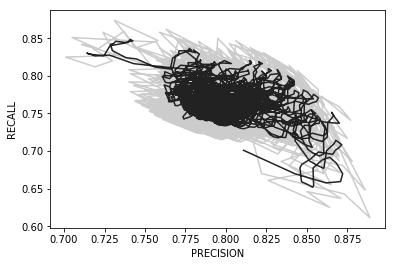

In [41]:
prec_hat=savgol_filter(file1['PRECISION'], 11, 3)
rec_hat=savgol_filter(file1['RECALL'], 11, 3)
plt.xlabel('PRECISION')
plt.ylabel('RECALL')
plt.plot(file1['PRECISION'],file1['RECALL'], color='#cccccc')
plt.plot(prec_hat,rec_hat, color='#222222')
plt.show()

### Validation F1 Score

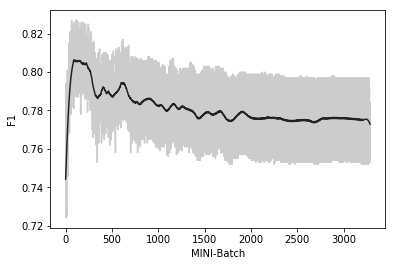

In [42]:
f1hat = savgol_filter(file1['F1'], 151, 3)
plt.xlabel('MINI-Batch')
plt.ylabel('F1')
plt.plot(T,file1['F1'], color='#cccccc')
plt.plot(T,f1hat, color='#222222')

# plt.locator_params(axis='x', nbins=9)
plt.show()
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if 30 % 15 == 0:
#         label.set_visible(True)


### Validation Accuracy

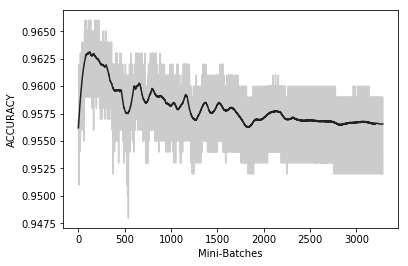

In [43]:
acchat=savgol_filter(file1['ACCURACY'], 151, 3)
plt.xlabel('Mini-Batches')
plt.ylabel('ACCURACY')
plt.plot(T,file1['ACCURACY'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### Training F1 Score

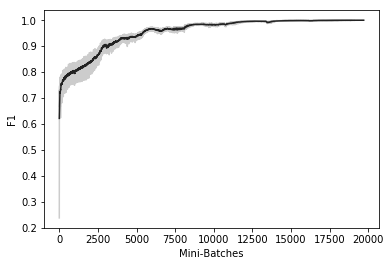

In [33]:
file2 = file.query('TYPE==0')
acchat=savgol_filter(file2['F1'], 51, 1)
T = np.arange(file2['F1'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('F1')
plt.plot(T,file2['F1'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### Training Accuracy

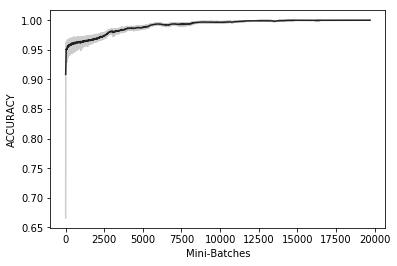

In [34]:
file2 = file.query('TYPE==0')
acchat=savgol_filter(file2['ACCURACY'], 51, 1)
T = np.arange(file2['ACCURACY'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('ACCURACY')
plt.plot(T,file2['ACCURACY'], color='#cccccc')
plt.plot(T,acchat, color='#222222')
plt.show()

### TEST 

In [35]:
file_test = pd.read_csv('chkDRIVEunet.tar-TEST.csv', index_col='TYPE')
file1 = file_test.query('TYPE==1')

### TEST F1 Score

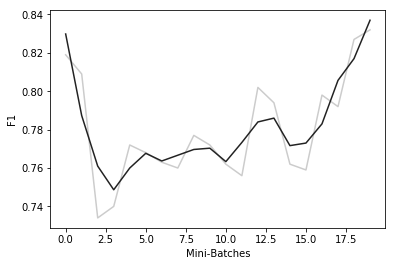

In [36]:
f1hat = savgol_filter(file_test['F1'], 3, 1)
T = np.arange(file_test['F1'].shape[0])
plt.xlabel('Mini-Batches')
plt.ylabel('F1')
plt.plot(T,file_test['F1'], color='#cccccc')
plt.plot(T,f1hat, color='#222222')
plt.show()